In [ ]:
!pip install matplotlib pandas_datareader tensorflow keras flask flask-ngrok yfinance

价格预测

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import yfinance as yf
from flask import Flask, jsonify
from flask_ngrok import run_with_ngrok
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import time


def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        dataX.append(dataset[i:(i+look_back), 0])
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

def train_ethereum_lstm():
    yf.pdr_override()
    df = pdr.get_data_yahoo('ETH-USD', start='2020-01-01', end='2023-03-24')
    dataset = df['Close'].values
    dataset = dataset.reshape(-1, 1)

    scaler = MinMaxScaler(feature_range=(0, 1))
    dataset = scaler.fit_transform(dataset)

    train_size = int(len(dataset) * 0.67)
    test_size = len(dataset) - train_size
    train, test = dataset[0:train_size, :], dataset[train_size:len(dataset), :]

    look_back = 14
    X_train, y_train = create_dataset(train, look_back)
    X_test, y_test = create_dataset(test, look_back)

    X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
    X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

    model = Sequential()
    model.add(LSTM(50, input_shape=(1, look_back)))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=2)

    return model, scaler

def predict_ethereum_price(model, scaler, days_ahead=1):
    today = datetime.today()
    end_date = today + timedelta(days=days_ahead + 14)  # 加上14天，以确保有足够的数据来进行预测
    df = pdr.get_data_yahoo('ETH-USD', start='2017-01-01', end=end_date.strftime('%Y-%m-%d'))
    dataset = df['Close'].values
    dataset = dataset.reshape(-1, 1)
    dataset = scaler.transform(dataset)

    look_back = 14
    X, y = create_dataset(dataset, look_back)

    X = np.reshape(X, (X.shape[0], 1, X.shape[1]))
    predictions = model.predict(X)

    last_prediction = predictions[-days_ahead][0]
    predicted_price = scaler.inverse_transform([[last_prediction]])[0][0]

    # 计算预测价格对应的日期
    last_date = df.index[-1]
    predicted_date = last_date + timedelta(days=days_ahead)

    return predicted_price, predicted_date

model, scaler = train_ethereum_lstm()
predicted_price, predicted_date = predict_ethereum_price(model, scaler, days_ahead=1)
print("Predicted Ethereum price for {}: {}".format(predicted_date.strftime('%Y-%m-%d'), predicted_price))

# app = Flask(__name__)
# run_with_ngrok(app)

# @app.route("/predict_ethereum_price", methods=['GET'])
# def predict_price():
#     predicted_price = predict_ethereum_price(model, scaler)
#     return jsonify({"predicted_price": predicted_price})

# if __name__ == "__main__":
#     app.run()


[*********************100%***********************]  1 of 1 completed
Epoch 1/100
774/774 - 4s - loss: 0.0046 - 4s/epoch - 6ms/step
Epoch 2/100
774/774 - 1s - loss: 0.0017 - 1s/epoch - 2ms/step
Epoch 3/100
774/774 - 1s - loss: 0.0015 - 1s/epoch - 2ms/step
Epoch 4/100
774/774 - 1s - loss: 0.0011 - 1s/epoch - 2ms/step
Epoch 5/100
774/774 - 1s - loss: 0.0011 - 1s/epoch - 2ms/step
Epoch 6/100
774/774 - 1s - loss: 0.0011 - 1s/epoch - 2ms/step
Epoch 7/100
774/774 - 2s - loss: 0.0011 - 2s/epoch - 2ms/step
Epoch 8/100
774/774 - 2s - loss: 9.9301e-04 - 2s/epoch - 2ms/step
Epoch 9/100
774/774 - 2s - loss: 0.0010 - 2s/epoch - 2ms/step
Epoch 10/100
774/774 - 1s - loss: 9.8043e-04 - 1s/epoch - 2ms/step
Epoch 11/100
774/774 - 2s - loss: 9.6853e-04 - 2s/epoch - 2ms/step
Epoch 12/100
774/774 - 1s - loss: 0.0010 - 1s/epoch - 2ms/step
Epoch 13/100
774/774 - 1s - loss: 9.5874e-04 - 1s/epoch - 2ms/step
Epoch 14/100
774/774 - 1s - loss: 9.5579e-04 - 1s/epoch - 2ms/step
Epoch 15/100
774/774 - 1s - loss: 9.30

交易策略

Predicted Ethereum price for 2023-03-24: 1883.294217397375
[*********************100%***********************]  1 of 1 completed
61/61 [==============================] - 0s 2ms/step
[*********************100%***********************]  1 of 1 completed
61/61 [==============================] - 0s 2ms/step
[*********************100%***********************]  1 of 1 completed
61/61 [==============================] - 0s 2ms/step
[*********************100%***********************]  1 of 1 completed
61/61 [==============================] - 0s 2ms/step
[*********************100%***********************]  1 of 1 completed
61/61 [==============================] - 0s 2ms/step
[*********************100%***********************]  1 of 1 completed
61/61 [==============================] - 0s 2ms/step
[*********************100%***********************]  1 of 1 completed
61/61 [==============================] - 0s 2ms/step
[*********************100%***********************]  1 of 1 completed
61/61 [===========

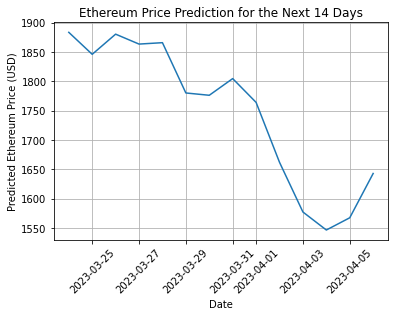

[*********************100%***********************]  1 of 1 completed
61/61 [==============================] - 0s 3ms/step
[*********************100%***********************]  1 of 1 completed
61/61 [==============================] - 0s 3ms/step
[*********************100%***********************]  1 of 1 completed
61/61 [==============================] - 0s 2ms/step
[*********************100%***********************]  1 of 1 completed
61/61 [==============================] - 0s 2ms/step
[*********************100%***********************]  1 of 1 completed
61/61 [==============================] - 0s 2ms/step
[*********************100%***********************]  1 of 1 completed
61/61 [==============================] - 0s 2ms/step
[*********************100%***********************]  1 of 1 completed
61/61 [==============================] - 0s 2ms/step
[*********************100%***********************]  1 of 1 completed
61/61 [==============================] - 0s 2ms/step
[*********************10

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

def generate_trading_signals(predicted_prices, n=5):
    signals = []

    for i in range(n, len(predicted_prices)):
        price_history = predicted_prices[i - n:i]
        price_diff = np.diff(price_history)
        signal = 1 if price_diff[-1] > 0 else -1
        signals.append(signal)

    return signals

def train_random_forest_classifier(X, y):
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X, y)
    return clf

def execute_rf_trade_strategy(predicted_prices, transaction_fee=0.005):
    global eth_held, cash

    n = 5
    trading_signals = generate_trading_signals(predicted_prices, n)
    X = np.array([predicted_prices[i:i + n] for i in range(len(predicted_prices) - n)]).reshape(-1, n)
    y = trading_signals

    clf = train_random_forest_classifier(X[:-1], y[:-1])
    predicted_signal = clf.predict(X[-1].reshape(1, -1))

    if predicted_signal == 1:  # Buy
        eth_to_buy = cash / predicted_prices[-1]
        eth_held += eth_to_buy * (1 - transaction_fee)
        cash = 0

    elif predicted_signal == -1:  # Sell
        cash += eth_held * predicted_prices[-1] * (1 - transaction_fee)
        eth_held = 0

    return eth_held, cash

initial_investment = 100
eth_held = 0
cash = initial_investment
print("Predicted Ethereum price for {}: {}".format(predicted_date.strftime('%Y-%m-%d'), predicted_price))


# 预测未来14天的以太坊价格
predicted_prices = []
predicted_dates = []
for i in range(1, 15):
    price, date = predict_ethereum_price(model, scaler, days_ahead=i)
    predicted_prices.append(price)
    predicted_dates.append(date)

# 绘制折线图
plt.plot(predicted_dates, predicted_prices)
plt.xlabel('Date')
plt.ylabel('Predicted Ethereum Price (USD)')
plt.title('Ethereum Price Prediction for the Next 14 Days')
plt.xticks(rotation=45)
plt.grid()
plt.show()

# 发动交易
for i in range(1, 15):
    price, date = predict_ethereum_price(model, scaler, days_ahead=i)
    predicted_prices.append(price)
    predicted_dates.append(date)
    eth_held, cash = execute_rf_trade_strategy(predicted_prices)

final_balance = cash + eth_held * predicted_prices[-1]
print("Final balance: ${:.2f}".format(final_balance))

# app = Flask(__name__)
# run_with_ngrok(app)

# @app.route("/predict_ethereum_price", methods=['GET'])
# def predict_price():
#     predicted_price = predict_ethereum_price(model, scaler)
#     return jsonify({"predicted_price": predicted_price})

# if __name__ == "__main__":
#     app.run()
